EDA OF Titanic dataset
-----------------------

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#loading Titanic data set
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Analysis Missing Data 
-------------

In [3]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


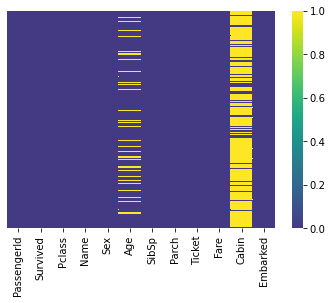

In [4]:
#using seaborn 
sns.heatmap(df.isnull(),yticklabels = False ,cmap = "viridis" , center = 0.4)

Roughly 20% data of the age column is missing. The proportion of age missing is likely small enough for resonable 
replacement with some form of imputation.
for cabin column , it look like we are missing too much of data to do something useful with at a basic level.

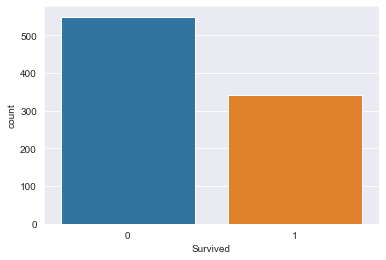

In [5]:
sns.set_style("darkgrid")
sns.countplot(x = "Survived" , data = df)

Survived = 0 means the passengers does not survived and Survived = 1 means the passengers still survived . 

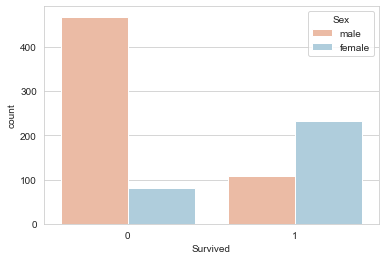

In [6]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived" , data = df , hue = "Sex" , palette = "RdBu")

approx. 450 males and approx. 90 females are not survived.
approx. 220 females and approx. 100 males are survived.

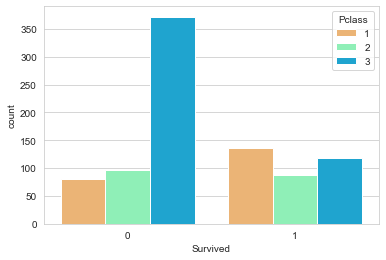

In [7]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived" , data = df , hue = "Pclass" , palette = "rainbow_r" )

approx. 370 peoples of the 3rd class passengers  are not survived and approx. 170 peoples of 1st class passengers are survived .

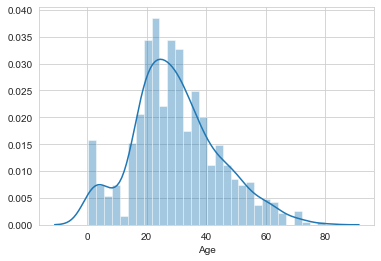

In [8]:
sns.distplot(df["Age"].dropna() , bins = 30 )

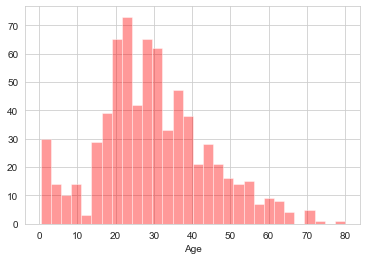

In [9]:
sns.distplot(df["Age"].dropna() , bins = 30 , kde = False , color = "r")

Most of the 20-40 young age peoples are travel in titanic.

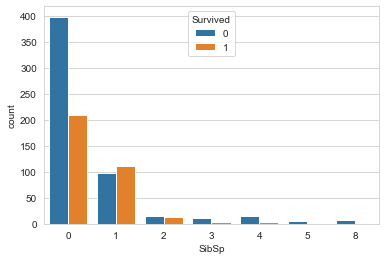

In [10]:
sns.countplot(x = "SibSp" , data = df , hue = "Survived")

It Give information about siblings and spoach of passengers who are still survived .

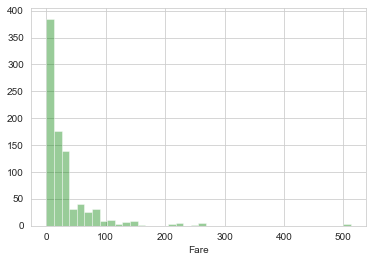

In [11]:
sns.distplot(df["Fare"] , bins = 40 , kde = False , color = "g")

Data Cleaning
-------------

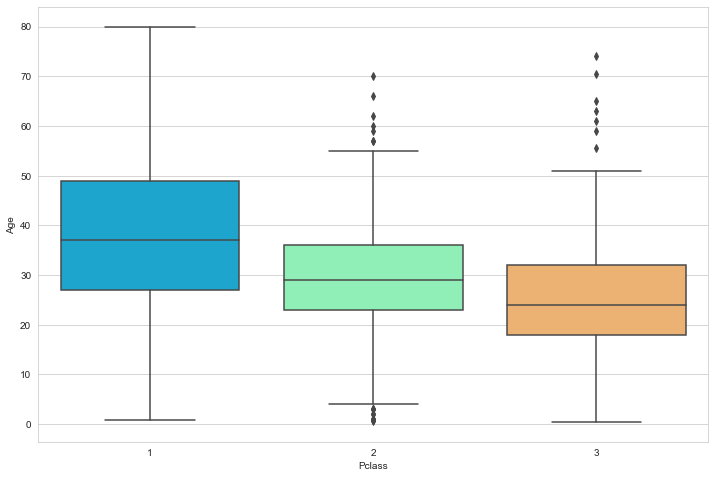

In [12]:
plt.figure(figsize = (12 , 8) , facecolor = "w")
sns.set_style("whitegrid")
sns.boxplot(x = "Pclass" , y = "Age" , data = df , palette = "rainbow")

Boxplot give the average value of age and we will use these average age value to impute based on Pclass for age .

In [13]:
def compute_age(columns) :
    age = columns[0]
    Pclass = columns[1]
    if pd.isnull(age) :
        if Pclass == 1:
            return 37
        elif Pclass == 2 :
            return 29
        else :
            return 24 
        
    else :
        return age

In [14]:
df["Age"] = df[["Age" , "Pclass"]].apply(compute_age, axis = 1)

Now check again using heatmap.

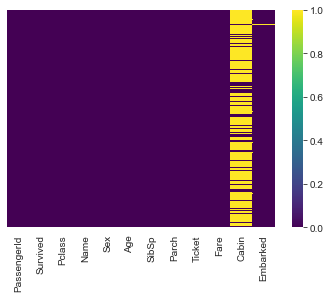

In [15]:
sns.heatmap(df.isnull() , yticklabels = False , cmap = "viridis")

Now, we drop the Cabin column and the row in embarked that is NaN.

In [16]:
df.drop("Cabin" , axis = 1 , inplace = True)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


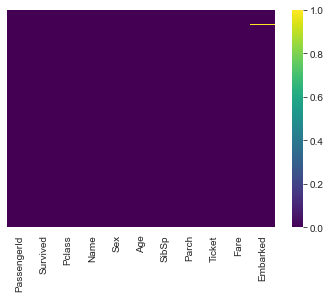

In [18]:
sns.heatmap(df.isnull() , yticklabels = False , cmap = "viridis")

In [19]:
df.dropna(inplace = True)

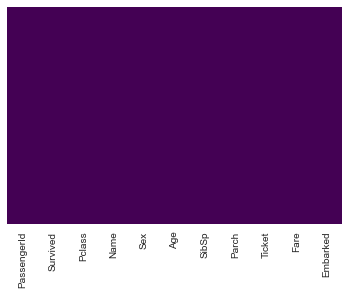

In [20]:
sns.heatmap(df.isnull() , yticklabels = False , cmap = "viridis", cbar = False)

Converting Categorical Features
-----------------------------------

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


we will need to convert categorical features to dummy variables using pandas otherwise our macine learning algorithm 
won't be able to work .

In [22]:
sex = pd.get_dummies(df["Sex"] , drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
embark = pd.get_dummies(df["Embarked"] , drop_first = True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Deleting all those columns which are not required .

In [24]:
train = df.drop(["Sex" , "Embarked" , "Name" , "Ticket"] , axis = 1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [25]:
train = pd.concat([train , sex , embark] , axis = 1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Building a logistic regression model
----------------------------------

Splitting our data into training set and test set.

In [26]:
test_set = train.drop("Survived" , axis = 1)
test_set.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [27]:
training_set = train["Survived"]
training_set.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train , X_test , Y_train , Y_test = train_test_split(test_set , training_set , test_size = 0.30 , random_state = 101)

Training and Predicting
------------------------

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression()
logmodel.fit(X_train , Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
accuracy = confusion_matrix(Y_test , predictions)
accuracy

array([[148,  15],
       [ 39,  65]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(Y_test , predictions)

0.797752808988764